# **Request to PUNK IPA API**

In [56]:
# import libraries here

import requests
import pandas as pd
import json

# your code here
PUNKIPA = 'https://api.punkapi.com/v2/beers'

response = requests.get(PUNKIPA)
beer = response.json()
#print(json.dumps(beer[0], indent=6))   
beer_df = pd.DataFrame(beer)
newbeer = beer_df[['name','abv','tagline','srm','ebc','food_pairing','ingredients','ph','method']]

newbeer.head() 

,name,abv,tagline,srm,ebc,food_pairing,ingredients,ph,method
0,Buzz,4.5,A Real Bitter Experience.,10.0,20.0,"[Spicy chicken tikka masala, Grilled chicken q...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",4.4,"{'mash_temp': [{'temp': {'value': 64, 'unit': ..."
1,Trashy Blonde,4.1,You Know You Shouldn't,15.0,15.0,"[Fresh crab with lemon, Garlic butter dipping ...","{'malt': [{'name': 'Maris Otter Extra Pale', '...",4.4,"{'mash_temp': [{'temp': {'value': 69, 'unit': ..."
2,Berliner Weisse With Yuzu - B-Sides,4.2,Japanese Citrus Berliner Weisse.,4.0,8.0,"[Smoked chicken wings, Miso ramen, Yuzu cheese...","{'malt': [{'name': 'Propino Pale Malt', 'amoun...",3.2,"{'mash_temp': [{'temp': {'value': 60, 'unit': ..."
3,Pilsen Lager,6.3,Unleash the Yeast Series.,15.0,30.0,"[Spicy crab cakes, Spicy cucumber and carrot T...","{'malt': [{'name': 'Extra Pale', 'amount': {'v...",4.4,"{'mash_temp': [{'temp': {'value': 65, 'unit': ..."
4,Avery Brown Dredge,7.2,Bloggers' Imperial Pilsner.,5.0,10.0,"[Vietnamese squid salad, Chargrilled corn on t...","{'malt': [{'name': 'Lager Malt', 'amount': {'v...",4.4,"{'mash_temp': [{'temp': {'value': 66, 'unit': ..."


In [37]:
newbeer['method'].iloc[0]

{'mash_temp': [{'temp': {'value': 64, 'unit': 'celsius'}, 'duration': 75}],
 'fermentation': {'temp': {'value': 19, 'unit': 'celsius'}},
 'twist': None}

In [43]:
newbeer['food_pairing'] = newbeer['food_pairing'].apply(lambda x: ','.join(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
newbeer['food_pairing'].value_counts()

Blue cheese beef burger,Glazed short ribs,Chocolate cake                                                          1
Poached sole fillet with capers,Summer fruit salad,Banana split                                                   1
Coffee dusted venison loin,Memphis-style beef short ribs,Chocolate orange brownies                                1
Grilled portabello mushroom burger,Chicken sausages with creamy mash,Caramel and banana meringue pie              1
Warm blackberry pie,Vinegar doused fish and chips,Aromatic korma curry with lemon and garlic naan                 1
Roasted wood pigeon with black pudding,Pan seared venison fillet with juniper sauce,Apricot coconut cake          1
Stilton on gingerbread biscuits,Pot roasted artichokes,Lamb chops with caramelised figs                           1
Smoked chicken wings,Miso ramen,Yuzu cheesecake                                                                   1
Vietnamese squid salad,Chargrilled corn on the cob with paprika butter,S

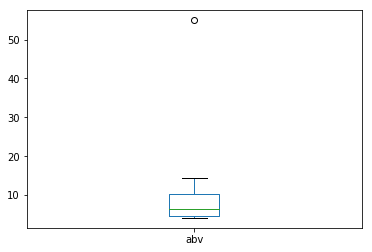

In [54]:
newbeer['abv'].plot(kind='box')

# Reading the Dataset of Beers

In [4]:
import pandas as pd
beers = pd.read_csv('REAL_Data_beers/NEW_DATA/beers_new.csv')
beers

,brewery_id,name,cat_id,style_id,abv,descript
0,812,Hocus Pocus,11,116,4.5,Our take on a classic summer ale. A toast to ...
1,264,Grimbergen Blonde,-1,-1,6.7,NaN
2,779,Widdershins Barleywine,-1,-1,9.1,NaN
3,287,Lucifer,-1,-1,8.5,NaN
4,1056,Bitter,-1,-1,4.0,NaN
...,...,...,...,...,...,...
5856,10,Honey Rye Ale,11.0,128.0,0.0,This beer is not very bitter which allows the ...
5857,10,Strawberry,11.0,121.0,0.0,Strawberry Harvest Lager is a wheat beer made ...
5858,10,Satsuma Wit,11.0,121.0,0.0,This Wit beer has a sweet and subtle citrus fl...
5859,1422,Abhi beer,7.0,89.0,0.0,NaN


# Import table of breweries

In [5]:
breweries = pd.read_csv('REAL_Data_beers/NEW_DATA/brewery_new.csv')
breweries

,id,name,address1,city,state,country,descript
0,1,(512) Brewing Company,"407 Radam, F200",Austin,Texas,United States,(512) Brewing Company is a microbrewery locate...
1,2,21st Amendment Brewery Cafe,563 Second Street,San Francisco,California,United States,The 21st Amendment Brewery offers a variety of...
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,Beersel,Vlaams Brabant,Belgium,NaN
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,Drammen,NaN,Norway,Aass Brewery was established in 1834 and is th...
4,5,Abbaye de Leffe,Dinant,Dinant,Namur,Belgium,NaN
...,...,...,...,...,...,...,...
1409,1416,Brewery Vivant,925 Cherry Street SE,Grand Rapids,MI,United States,Brewery Vivant is the realization of years of ...
1410,1417,Oakshire,NaN,Eugene,Or,United States,NaN
1411,1418,Oakshire,NaN,Eugene,Or,United States,NaN
1412,1422,Abhi Brewery,NaN,NaN,NaN,India,NaN


# Import table of categories

In [6]:
categories = pd.read_csv('REAL_Data_beers/NEW_DATA/categories_new.csv')
categories

,id,cat_name
0,1,British Ale
1,2,Irish Ale
2,3,North American Ale
3,4,German Ale
4,5,Belgian and French Ale
5,6,International Ale
6,7,German Lager
7,8,North American Lager
8,9,Other Lager
9,10,International Lager


# Import table from styles

In [7]:
styles = pd.read_csv('REAL_Data_beers/NEW_DATA/Style_new.csv')
styles

,id,cat_id,style_name
0,1,1,Classic English-Style Pale Ale
1,2,1,English-Style India Pale Ale
2,3,1,Ordinary Bitter
3,4,1,Special Bitter or Best Bitter
4,5,1,Extra Special Bitter
...,...,...,...
136,137,11,Wood- and Barrel-Aged Sour Beer
137,138,11,Aged Beer
138,139,11,Other Strong Ale or Lager
139,140,11,Non-Alcoholic Beer


# HOLLAAA